In [24]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("dulieuxettuyendaihoc.csv", header=0, delimiter=",", encoding="utf-8")
df = df[["GT", "DT", "KV", "KT", "M1", "M2", "M3", "NGAYTHI", "DINHHUONGNGHENGHIEP"]]

# Phần 1 xử lý dữ liệu cơ bản

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GT                   100 non-null    object 
 1   DT                   3 non-null      float64
 2   KV                   100 non-null    object 
 3   KT                   100 non-null    object 
 4   M1                   100 non-null    float64
 5   M2                   100 non-null    float64
 6   M3                   100 non-null    float64
 7   NGAYTHI              100 non-null    object 
 8   DINHHUONGNGHENGHIEP  100 non-null    object 
dtypes: float64(4), object(5)
memory usage: 7.2+ KB


In [26]:
# Đổi tên và xóa dữ liệu trùng và trống
df.rename(columns={"NGAYTHI": "NT", "DINHHUONGNGHENGHIEP": "NGHE"}, inplace=True)
df.head(5)
df.dropna(how="all", inplace=True)
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GT      100 non-null    object 
 1   DT      3 non-null      float64
 2   KV      100 non-null    object 
 3   KT      100 non-null    object 
 4   M1      100 non-null    float64
 5   M2      100 non-null    float64
 6   M3      100 non-null    float64
 7   NT      100 non-null    object 
 8   NGHE    100 non-null    object 
dtypes: float64(4), object(5)
memory usage: 7.2+ KB


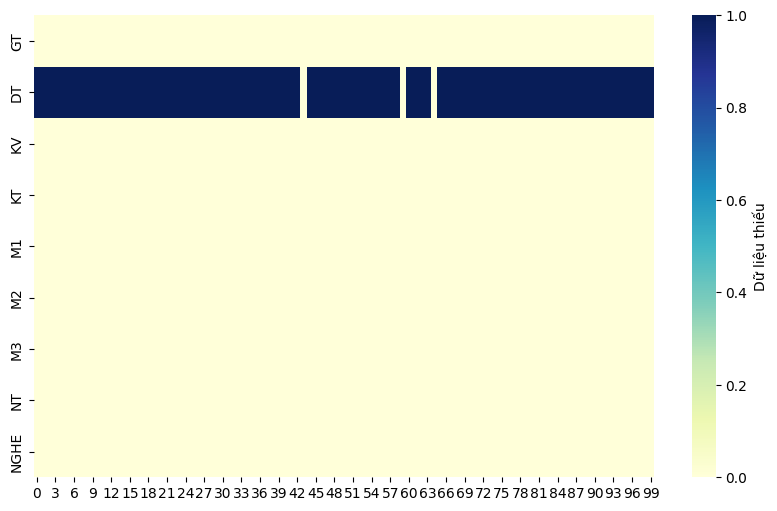

In [27]:
import matplotlib.pyplot as plt

# sử dụng biểu đồ heatmap để kiểm tra dữ liệu thiếu
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna().transpose(), cmap="YlGnBu", cbar_kws={"label": "Dữ liệu thiếu"})
plt.savefig("missingdata.png", dpi=100)

plt.show()

In [28]:
# xử lý dữ liệu thiếu
df.fillna({"DT": "KINH"}, inplace=True)
df.fillna({"M1": df["M1"].mean()}, inplace=True)
df.fillna({"M2": df["M2"].median()}, inplace=True)
df.fillna({"M3": 0}, inplace=True)
df

,GT,DT,KV,KT,M1,M2,M3,NT,NGHE
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No
...,...,...,...,...,...,...,...,...,...
95,F,KINH,1,C,5.25,1.50,6.25,7/20/2022,Yes
96,F,KINH,1,C,5.25,3.75,4.75,7/20/2022,No
97,M,KINH,2NT,C,7.00,8.00,4.00,7/20/2022,Yes
98,M,KINH,1,C,5.00,3.50,5.50,7/20/2022,No


# Phần 2: Kỹ thuật Feature Engineering

In [29]:
# Tạo cột điểm TBM
df["TBM"] = (df["M1"] + df["M2"] + df["M3"]) / 3
df

,GT,DT,KV,KT,M1,M2,M3,NT,NGHE,TBM
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333
...,...,...,...,...,...,...,...,...,...,...
95,F,KINH,1,C,5.25,1.50,6.25,7/20/2022,Yes,4.333333
96,F,KINH,1,C,5.25,3.75,4.75,7/20/2022,No,4.583333
97,M,KINH,2NT,C,7.00,8.00,4.00,7/20/2022,Yes,6.333333
98,M,KINH,1,C,5.00,3.50,5.50,7/20/2022,No,4.666667


In [30]:
# đổi điểm TBM thành dạng chữ
# df.loc[df['TBM'] < 5.0, 'XL'] = 'FAIL'

# df.loc[(df['TBM'] >= 5.0) & 
#        (df['TBM'] < 7.0), 'XL'] = 'FAIR'

# df.loc[(df['TBM'] >= 7.0) & 
#        (df['TBM'] < 9.0), 'XL'] = 'GOOD'

# df.loc[df['TBM'] >= 9.0, 'XL'] = 'EXCEL'
# df

In [31]:
# Đổi nhóm thi bằng phương thức map
dict_map = {"A1": "G1", "C": "G3", "D1": "G3", "A": "G1", "B": "G2"}
df["NHOM"] = df["KT"].map(dict_map)
df

,GT,DT,KV,KT,M1,M2,M3,NT,NGHE,TBM,NHOM
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667,G1
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000,G3
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000,G3
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333,G3
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333,G1
...,...,...,...,...,...,...,...,...,...,...,...
95,F,KINH,1,C,5.25,1.50,6.25,7/20/2022,Yes,4.333333,G3
96,F,KINH,1,C,5.25,3.75,4.75,7/20/2022,No,4.583333,G3
97,M,KINH,2NT,C,7.00,8.00,4.00,7/20/2022,Yes,6.333333,G3
98,M,KINH,1,C,5.00,3.50,5.50,7/20/2022,No,4.666667,G3


In [32]:
# xử dụng hàm để map dữ liệu với key=func
def fplus(x, y):
    return 1.0 if (x == "G1" or x == "G2") and (y >= 4.0) else 0.0


df["PLUS"] = list(map(fplus, df["NHOM"], df["TBM"]))
df

,GT,DT,KV,KT,M1,M2,M3,NT,NGHE,TBM,NHOM,PLUS
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667,G1,0.0
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000,G3,0.0
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000,G3,0.0
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333,G3,0.0
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333,G1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,F,KINH,1,C,5.25,1.50,6.25,7/20/2022,Yes,4.333333,G3,0.0
96,F,KINH,1,C,5.25,3.75,4.75,7/20/2022,No,4.583333,G3,0.0
97,M,KINH,2NT,C,7.00,8.00,4.00,7/20/2022,Yes,6.333333,G3,0.0
98,M,KINH,1,C,5.00,3.50,5.50,7/20/2022,No,4.666667,G3,0.0


# Sinh viên tự làm tạo cột MaxM = giá trị lớn nhất của (M1,M2,M3)

In [33]:
df['MaxM'] = df[['M1', 'M2', 'M3']].max(axis=1)
df

,GT,DT,KV,KT,M1,M2,M3,NT,NGHE,TBM,NHOM,PLUS,MaxM
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667,G1,0.0,4.50
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000,G3,0.0,6.00
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000,G3,0.0,6.75
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333,G3,0.0,5.25
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333,G1,1.0,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,F,KINH,1,C,5.25,1.50,6.25,7/20/2022,Yes,4.333333,G3,0.0,6.25
96,F,KINH,1,C,5.25,3.75,4.75,7/20/2022,No,4.583333,G3,0.0,5.25
97,M,KINH,2NT,C,7.00,8.00,4.00,7/20/2022,Yes,6.333333,G3,0.0,8.00
98,M,KINH,1,C,5.00,3.50,5.50,7/20/2022,No,4.666667,G3,0.0,5.50


# Phần 3: Trực quan hóa dữ liệu

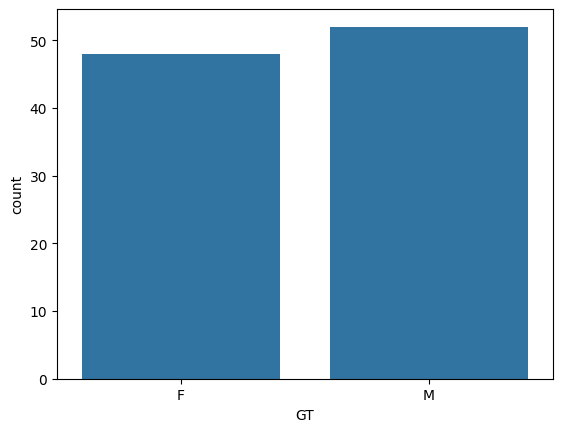

In [34]:
# biểu đồ đếm số lượng giới tính
sns.countplot(x="GT", data=df)
plt.show()

**Sinh viên tự làm tương tự cho các cột DT**

--> Dựa trên biểu đồ DT cho biết tại sao 
    ta không phân tích theo phân nhóm DT

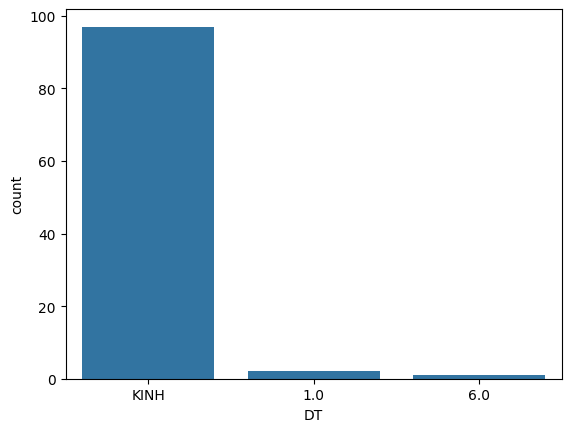

In [35]:
sns.countplot(x='DT', data=df)
plt.show()

**Trả lời**: Do dân tộc kinh chiếm đa số so với các dân tộc khác nên khó so sánh

**Sinh viên tự làm tương tự cho các cột NHOM**

--> Dựa trên biểu đồ NHOM 
    hãy cho biết nhóm nào có lượng thí sinh đông nhất 
    và thấp nhất

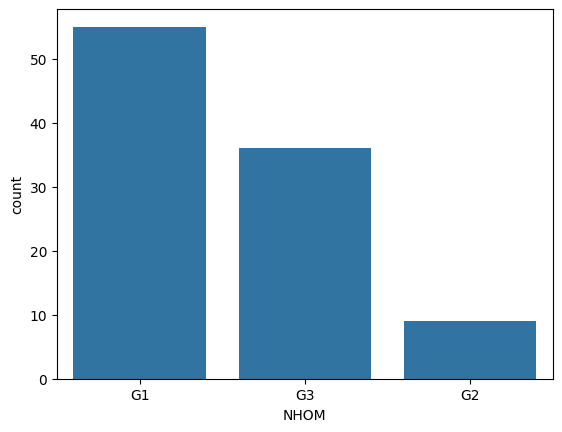

In [36]:
sns.countplot(x='NHOM', data=df)
plt.show()

**Trả lời**: nhóm có số lượng thí sinh đông nhất là nhóm **G1** và nhóm có số lượng thí sinh thấp nhất là nhóm **G2**

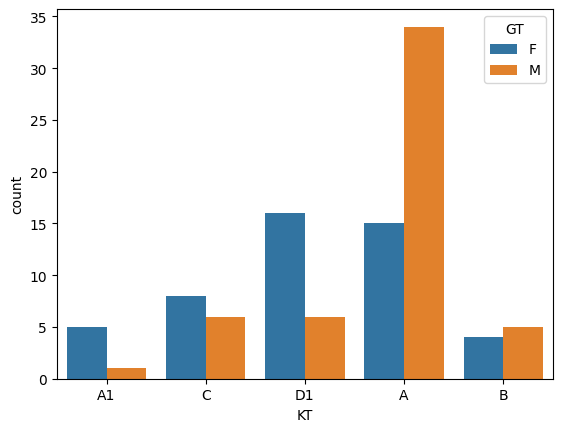

In [37]:
sns.countplot(x='KT', hue='GT',data=df)
plt.show()

**Sinh viên tự làm tương tự cho các nhóm 
biến định tính: (KV,KT)**

-->Hãy cho biết khối A có sinh viên khu vực nào đăng ký nhiều nhất

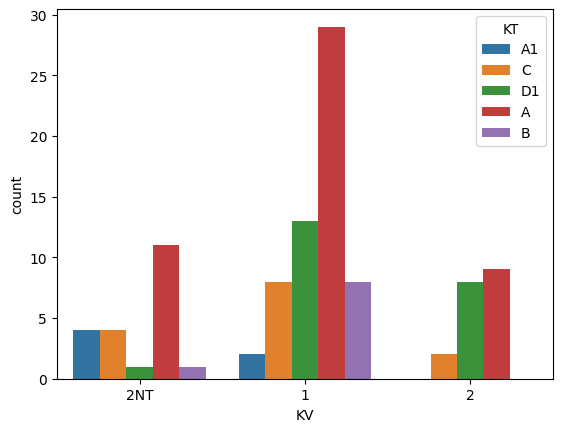

In [39]:
sns.countplot(x='KV', hue='KT', data=df)
plt.show()

**Trả lời**: Khối **A** có sinh viên khu vực 1 đăng ký nhiều nhất. 

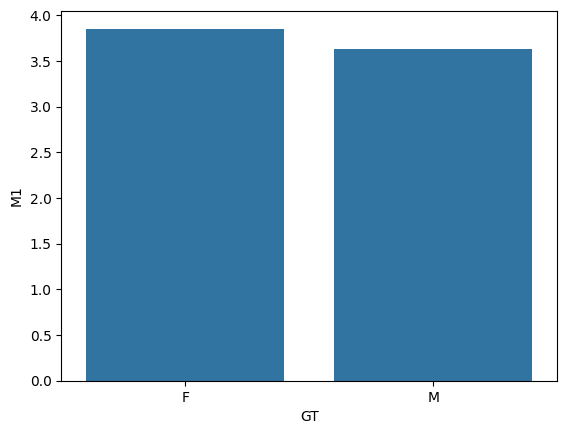

In [40]:
sns.barplot(x="GT", y="M1", data=df, errorbar=None)
plt.show()

**Hãy so sánh trung bình điểm M2 theo NHOM**

-> Cho biết nhóm thi nào có điểm thi M2 cao nhất

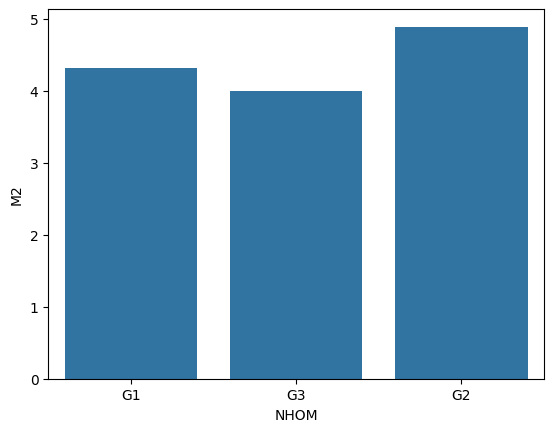

In [ ]:
sns.barplot(x='NHOM', y='M2', data=df, errorbar=None)
plt.show()

**Trả lời**: nhóm **G2** điểm thi **M2** cao nhất

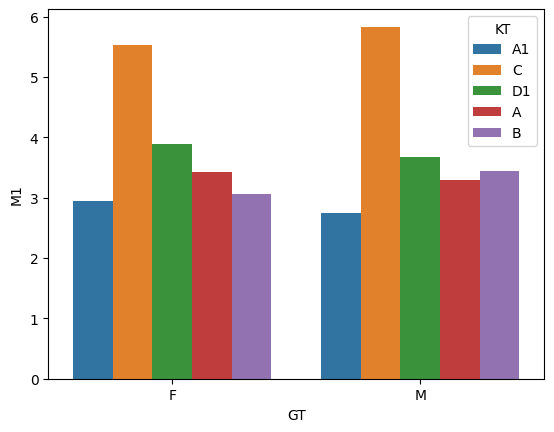

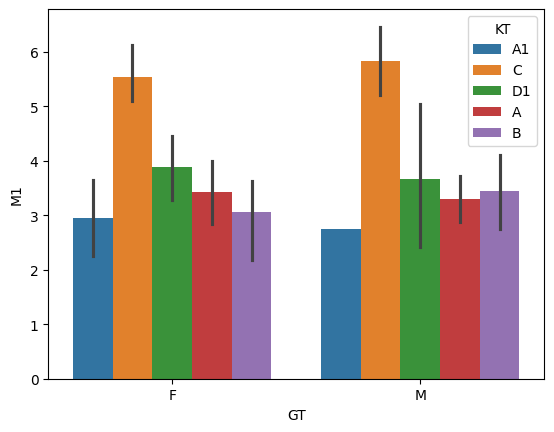

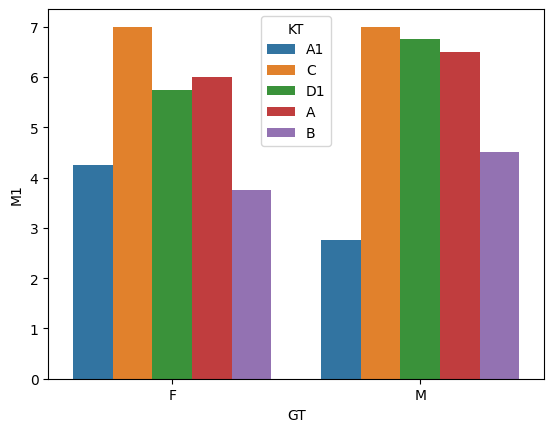

In [43]:
sns.barplot(x="GT", y="M1", hue="KT", data=df, errorbar=None)
plt.show()

sns.barplot(x="GT", y="M1", hue="KT", data=df)
plt.show()

sns.barplot(x="GT", y="M1", hue="KT", data=df, errorbar=None, estimator=max)
plt.show()

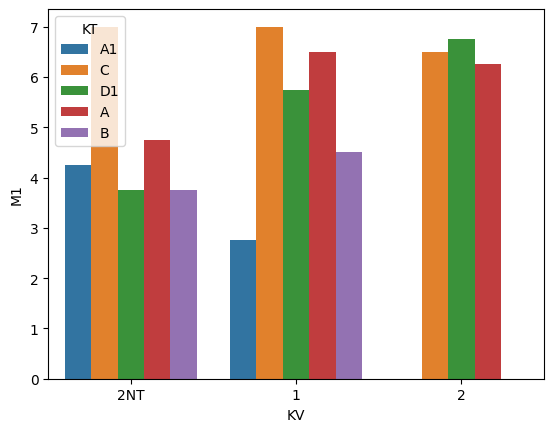

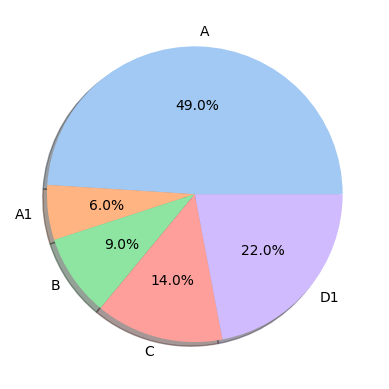

In [44]:
import numpy as np

sns.barplot(x="KV", y="M1", hue="KT", data=df, errorbar=None, estimator=np.max)
plt.show()

gb = df.groupby(["KT"])["KT"].agg(["count"])

labels = gb.index  # labels = ['A','A1','B','C','D1']
data = list(gb["count"])  # data= [49,6,9,14,22]

colors = sns.color_palette("pastel")  # Tạo bảng màu

plt.pie(data, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)

plt.show()

**Sinh viên tự viết thống kê tỉ lệ phần trăm cho KV**

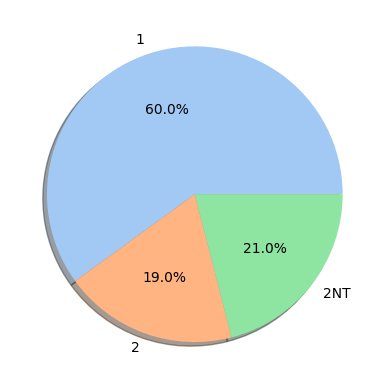

In [45]:
gb = df.groupby(["KV"])["KV"].agg(["count"])

labels = gb.index  # labels = ['A','A1','B','C','D1']
data = list(gb["count"])  # data= [49,6,9,14,22]

colors = sns.color_palette("pastel")  # Tạo bảng màu

plt.pie(data, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)

plt.show()

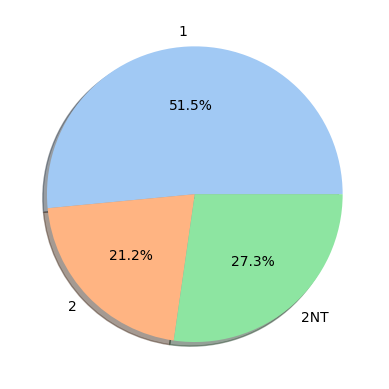

In [46]:
gb = df.groupby(["KV"])["PLUS"].agg(["sum"])

labels = gb.index
data = list(gb["sum"])

colors = sns.color_palette("pastel")  # Tạo bảng màu

plt.pie(data, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)

plt.show()

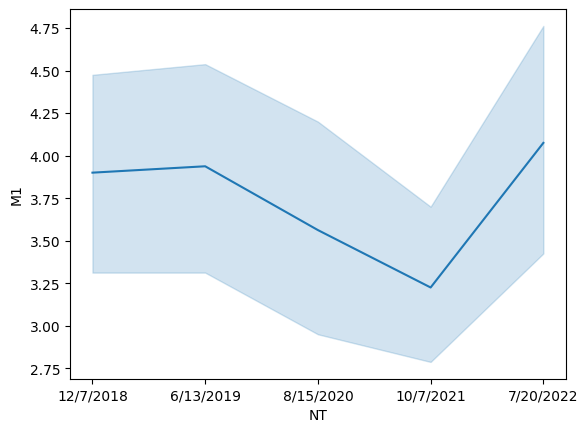

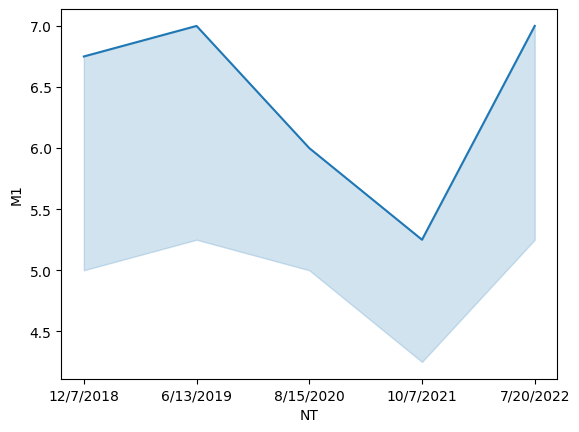

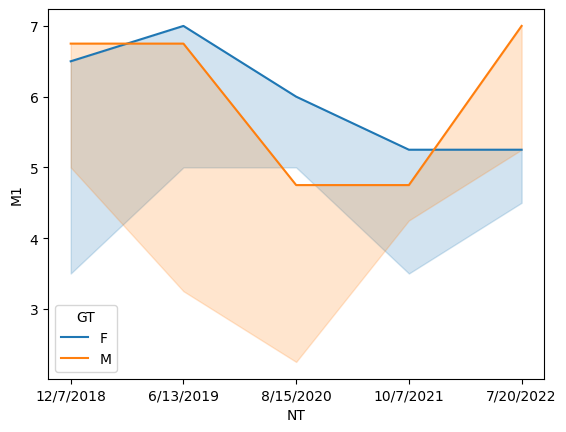

In [47]:
sns.lineplot(x="NT", y="M1", data=df)
plt.show()

sns.lineplot(x="NT", y="M1", data=df, estimator=np.max)
plt.show()

sns.lineplot(x="NT", y="M1", hue="GT", data=df, estimator=np.max)
plt.show()

# Phần 4: Phân tích mô tả định lượng - THỐNG KÊ MÔ TẢ

In [49]:
# print(f'{df["M1"].min()}\n{df["M1"].max()}\n')
# print(f'{df["M1"].mean()}\n{df["M1"].median()}\n')
# print(f'{df["KT"].mode()}\n')
# print(f'{df["M1"].quantile(0.25)}\n')

print(f'Min: {df["M1"].min()}')
print(f'Max: {df["M1"].max()}')
print(f'Mean: {df["M1"].mean()}')
print(f'Median: {df["M1"].median()}')
print(f'Mode: {df["KT"].mode()}')
print(f'Q1: {df["M1"].quantile(0.25)}')

Min: 1.0
Max: 7.0
Mean: 3.74
Median: 3.625
Mode: 0    A
Name: KT, dtype: object
Q1: 2.5


**Hãy tính phân vị thứ 9 trong thập phân vị (gọi là p9) cho M1 và M2. Gợi ý: phân vị thứ 9 có tỉ lệ là 0.9**

In [53]:
print(f"P9: {df[['M1', 'M2']].quantile(0.9)}")

P9: M1    5.3
M2    5.5
Name: 0.9, dtype: float64


In [54]:
df["M1"].max() - df["M1"].min() # range

df[["M1", "M2"]].max() - df[["M1", "M2"]].min() # range

M1    6.0
M2    6.5
dtype: float64

**Bài tập: Hãy tính khoảng range cho M1 và M2**

In [55]:
df[["M1", "M2"]].max() - df[["M1", "M2"]].min()

M1    6.0
M2    6.5
dtype: float64

In [56]:
df["M1"].quantile(0.75) - df["M1"].quantile(0.25) # IQR

np.float64(2.25)

**Hãy tính độ lớn khoảng IQR cho M1 và M2**

- Hãy tính độ lớn khoảng dao động của M2 (gợi ý: |range|)
- Hãy tính độ lớn của IQR của M2 là bao nhiêu (gợi ý: |IQR|)
- Hãy tính khoảng giá trị IQR của M2 (gợi ý: [Q1;Q3])

In [59]:
print(f"Range: {df['M2'].max() - df['M2'].min()}")

print(f'IQR value: {df["M2"].quantile(0.75) - df["M2"].quantile(0.25)}')

print(f'IQR: {[df["M1"].quantile(0.25), df["M1"].quantile(0.75)]}')

Range: 6.5
IQR value: 1.25
IQR: [np.float64(2.5), np.float64(4.75)]


In [60]:
np.mean(np.abs(df["M1"] - np.mean(df["M1"]))) # Độ lệch trung bình (Mean Absolute Deviation)

np.float64(1.1600000000000001)

**Hãy tính độ lệch trung bình cho M1 và M2**

In [63]:
print(f'MAD M1: {np.mean(np.abs(df['M1'] - np.mean(df['M1'])))}')
print(f'MAD M2: {np.mean(np.abs(df['M2'] - np.mean(df['M2'])))}')


MAD M1: 1.1600000000000001
MAD M2: 0.8001999999999998


In [65]:
print(f'Phương sai: {df["M1"].var()}') # Phương sai

print(f'Độ lệch chuẩn: {df["M1"].std()}') # Độ lệch chuẩn

Phương sai: 2.0289393939393943
Độ lệch chuẩn: 1.424408436488423


In [66]:
print(df[["M1", "M2"]].mean())
print(df[["M1", "M2"]].std())

M1    3.740
M2    4.255
dtype: float64
M1    1.424408
M2    1.060053
dtype: float64


In [68]:
print(f'CV: {df[["M1", "M2"]].std() / df[["M1", "M2"]].mean()}')  # Hệ số biến thiên

print(df["M1"].describe())  # Thống kê mô tả

print(df[["M1", "M2", "M3"]].describe())  # Thống kê mô tả

cv = df[["M1", "M2", "M3"]].std() / df[["M1", "M2", "M3"]].mean() # Hệ số biến thiên
print(f"CV: {list(cv)}")

CV: M1    0.380858
M2    0.249131
dtype: float64
count    100.000000
mean       3.740000
std        1.424408
min        1.000000
25%        2.500000
50%        3.625000
75%        4.750000
max        7.000000
Name: M1, dtype: float64
               M1          M2          M3
count  100.000000  100.000000  100.000000
mean     3.740000    4.255000    4.875000
std      1.424408    1.060053    1.041136
min      1.000000    1.500000    2.750000
25%      2.500000    3.500000    4.250000
50%      3.625000    4.125000    4.750000
75%      4.750000    4.750000    5.500000
max      7.000000    8.000000    8.000000
CV: [0.3808578707188297, 0.2491311130540305, 0.2135664058628459]


**Bài tập**:

- Sinh viên viết code để tìm ra giá trị cv lớn nhất và nhỏ nhất của M1, M2, M3
- Hãy sắp xếp tăng dần danh sách các giá trị cv

In [72]:
cv = df[['M1', 'M2', 'M3']].std() / df[['M1', 'M2', 'M3']].mean()

print(f"Giá trị CV lớn nhất: {cv.max()}")
print(f"Giá trị CV nhỏ nhất: {cv.min()}")
print(f"Danh sách các giá trị CV sắp xếp tăng dần: {cv.sort_values()}")

Giá trị CV lớn nhất: 0.3808578707188297
Giá trị CV nhỏ nhất: 0.2135664058628459
Danh sách các giá trị CV sắp xếp tăng dần: M3    0.213566
M2    0.249131
M1    0.380858
dtype: float64


# Phân tích đơn biến định lượng (univariate analysis)

In [74]:
df["M1"].describe()

count    100.000000
mean       3.740000
std        1.424408
min        1.000000
25%        2.500000
50%        3.625000
75%        4.750000
max        7.000000
Name: M1, dtype: float64

In [75]:
df[["M1", "M2", "M3"]].describe()

,M1,M2,M3
count,100.000000,100.000000,100.000000
mean,3.740000,4.255000,4.875000
std,1.424408,1.060053,1.041136
min,1.000000,1.500000,2.750000
25%,2.500000,3.500000,4.250000
50%,3.625000,4.125000,4.750000
75%,4.750000,4.750000,5.500000
max,7.000000,8.000000,8.000000


In [76]:
df.groupby("GT")["M1"].describe()

,count,mean,std,min,25%,50%,75%,max
GT,,,,,,,,
F,48.0,3.854167,1.348594,1.25,3.1875,3.75,5.0,7.0
M,52.0,3.634615,1.496288,1.00,2.4375,3.50,4.5,7.0


**Câu hỏi**: Đánh giá xem nhóm giới tính nào thi M1 tốt hơn

**Trả lời**: Giới tính nữ thi M1 tốt hơn vì điểm trung bình cao hơn và độ lệch chuẩn thấp hơn (điểm thi ổn định hơn) 

In [77]:
df.groupby("GT")["M2"].std() / df.groupby("GT")["M2"].mean()

GT
F    0.252518
M    0.240146
Name: M2, dtype: float64

**Câu hỏi đặt ra**: 

Sinh viên có giới tính nam thì thi môn nào tốt hơn so với nữ

*Lưu ý*: Chỉ dùng 2 dòng code để thể hiện kết quả

In [79]:
df.groupby("GT")[["M1", "M2", "M3"]].describe(percentiles=[])

M1                                         M2                           \
   count      mean       std   min   50%  max count      mean       std  min   
GT                                                                             
F   48.0  3.854167  1.348594  1.25  3.75  7.0  48.0  4.046875  1.021909  1.5   
M   52.0  3.634615  1.496288  1.00  3.50  7.0  52.0  4.447115  1.067956  2.5   

                 M3                                         
    50%   max count      mean       std   min    50%   max  
GT                                                          
F   4.0  6.75  48.0  4.906250  0.946192  3.25  4.875  7.25  
M   4.5  8.00  52.0  4.846154  1.130194  2.75  4.625  8.00

**Trả lời**: Môn M2 sinh viên nam thi tốt hơn sinh viên nữ điểm trung bình cao hơn sinh viên nữ

# Trực quan dữ liệu phân tích univariate analysis

### So sánh giữa **Histogram** và **KDE/Displot**
| Đặc điểm                | Histogram                                    | KDE/Displot                                |
|-------------------------|----------------------------------------------|--------------------------------------------|
| **Hiển thị tần suất**   | Tần suất (số lượng) trong các khoảng giá trị | Xác suất mượt mà dựa trên phân phối dữ liệu|
| **Ưu điểm**             | Dễ đọc, trực quan, phù hợp với dữ liệu thô  | Hiển thị xu hướng rõ ràng hơn             |
| **Nhược điểm**          | Có thể bị nhiễu khi số lượng bins không phù hợp | Không phù hợp với dữ liệu không liên tục  |
| **Mục đích sử dụng**    | Tìm hiểu tần suất từng nhóm giá trị         | Tìm hiểu phân phối mượt                   |

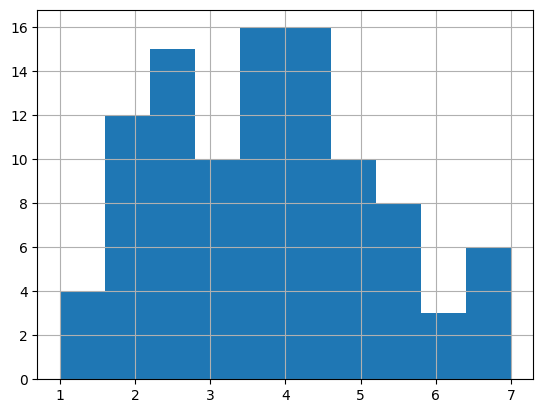

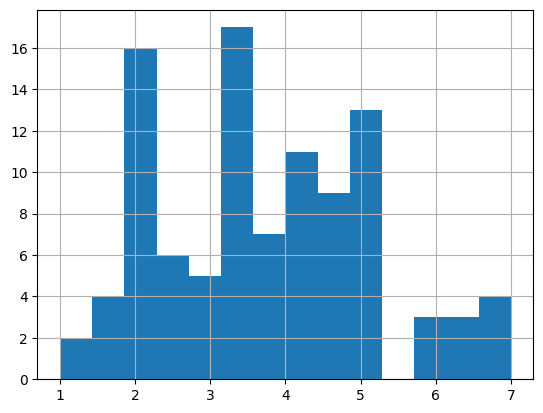

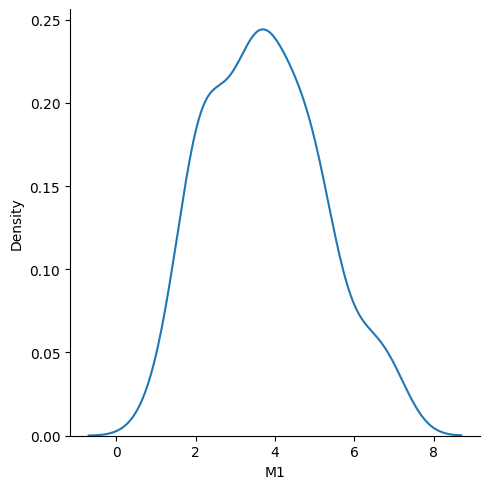

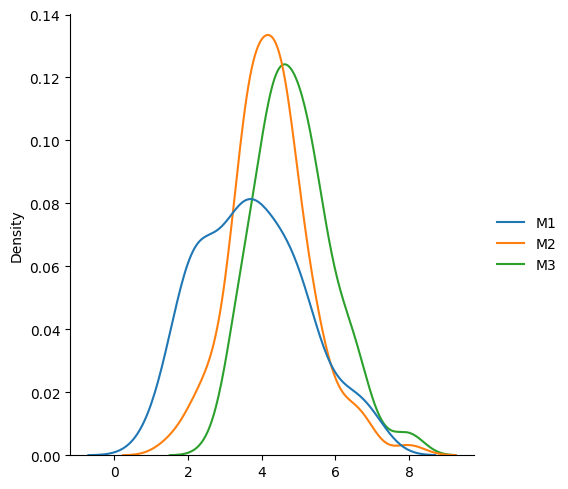

In [80]:
df["M1"].hist()
plt.show()

df["M1"].hist(bins=14)
plt.show()

sns.displot(df, x="M1", kind="kde")
plt.show()

sns.displot(data=df[["M1", "M2", "M3"]], kind="kde")
plt.show()

In [82]:
df[["M1", "M2", "M3"]].skew()

M1    0.333221
M2    0.472551
M3    0.607063
dtype: float64

**Hãy cho biết phân phối của biến số nào gần với phân phối chuẩn hơn**

**Trả lời**: biến số M1 gần với phân phối chuẩn hơn vì skewness của M1 là thấp nhất

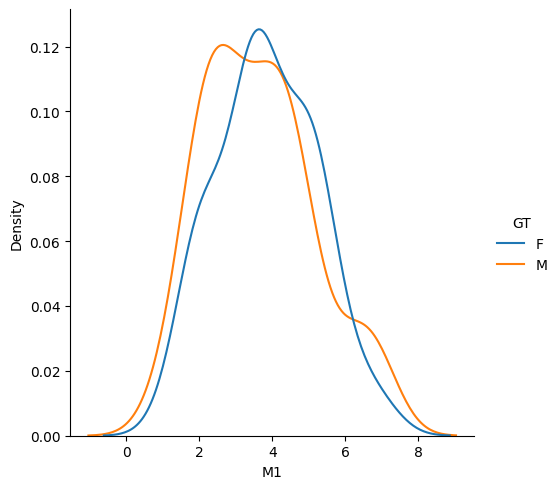

In [81]:
sns.displot(df, x="M1", hue="GT", kind="kde")
plt.show()

In [83]:
print(df.groupby("GT")["M1"].skew())

GT
F    0.127992
M    0.524137
Name: M1, dtype: float64


**Câu hỏi**: Nhóm giới tính nào có phân phối điểm gần phân phối chuẩn

**Trả lời**: Nhóm nữ gần phân phối chuẩn hơn vì có skewness thấp hơn

In [85]:
print(df["M1"].skew())

print(df[["M1", "M2", "M3"]].skew())

print(df[["M1"]].kurtosis())

0.33322084231625376
M1    0.333221
M2    0.472551
M3    0.607063
dtype: float64
M1   -0.517004
dtype: float64


**Câu hỏi**: biến M1 có độ nhọn như thế nào

**Trả lời**: biến M1 có độ nhọn là `0.333` Phân phối lệch phải 

In [86]:
df[["M1", "M2", "M3"]].kurtosis()

M1   -0.517004
M2    1.372439
M3    0.442173
dtype: float64

**Hãy cho biết dạng phân phối nào là thin, fat và fit**

**Trả lời**: M1 < 0: fat, M2 > 0: thin, M3 > 0: thin 

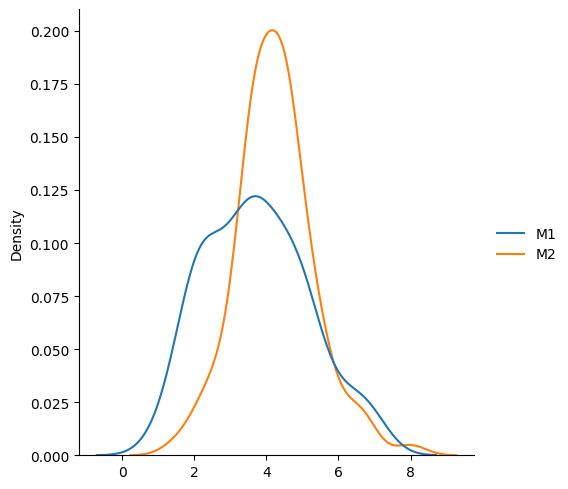

In [87]:
sns.displot(data=df[["M1", "M2"]], kind="kde")
plt.show()

In [88]:
df[["M1", "M2"]].kurtosis()

M1   -0.517004
M2    1.372439
dtype: float64

**Câu hỏi**: Nhìn biểu đồ hãy cho biết ý nghĩa của kutorsis 
của 'M1','M2'

**Trả lời**: kutorsis của M1 < 0 nên là fat, còn kutorsis của M2 > 0 nên là thin. M1 có phân phối gần với phân phối chuẩn hơn M2.

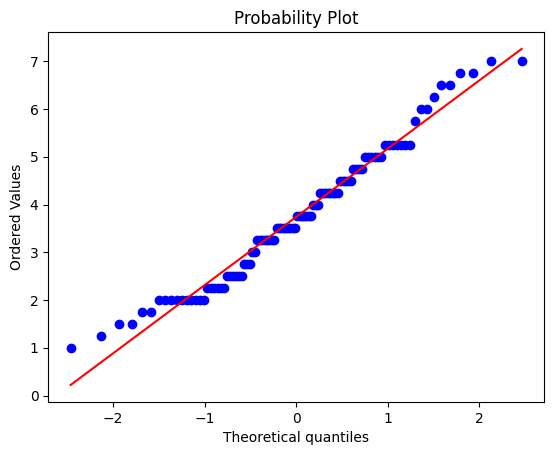

In [89]:
from scipy import stats

stats.probplot(df["M1"], plot=sns.mpl.pyplot)
plt.show()

**Hãy cho biết phân phối M1 có gần như phân phối chuẩn hay không**

**Trả lời**: Có, Vì các điểm đều nằm gần với đường thẳng phân phối chuẩn 

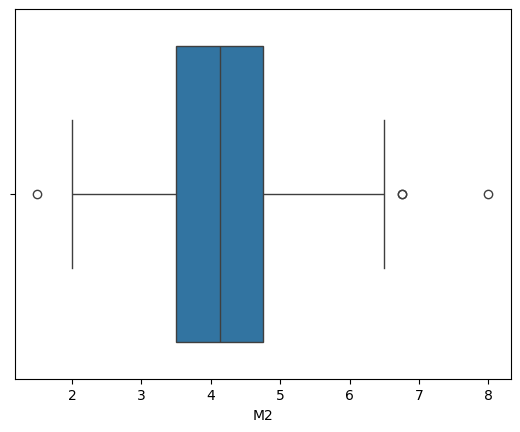

In [90]:
sns.boxplot(data=df["M2"], orient="h")
plt.show()

**Với điểm M2**

- Hãy tính khoảng giá trị nghi ngờ bất thường
- Hãy tính khoảng giá trị được cho là bất thường
- Hãy tính xem có bao nhiêu sinh viên có điểm thi là bất thường

In [92]:
IQR = df["M2"].quantile(0.75) - df["M2"].quantile(0.25)

print(f"Khoảng giá trị nghi ngờ bất thường: {df['M2'].quantile(0.25) - 1.5 * IQR} - {df['M2'].quantile(0.75) + 1.5 * IQR}")

print(f"Khoảng giá trị được cho là bất thường: {df['M2'].quantile(0.25) - 3 * IQR} - {df['M2'].quantile(0.75) + 3 * IQR}")

print(f"Số sinh viên có điểm thi là bất thường: {df[(df['M2'] < df['M2'].quantile(0.25) - 1.5 * IQR) | (df['M2'] > df['M2'].quantile(0.75) + 1.5 * IQR)].shape[0]}")

Khoảng giá trị nghi ngờ bất thường: 1.625 - 6.625
Khoảng giá trị được cho là bất thường: -0.25 - 8.5
Số sinh viên có điểm thi là bất thường: 4


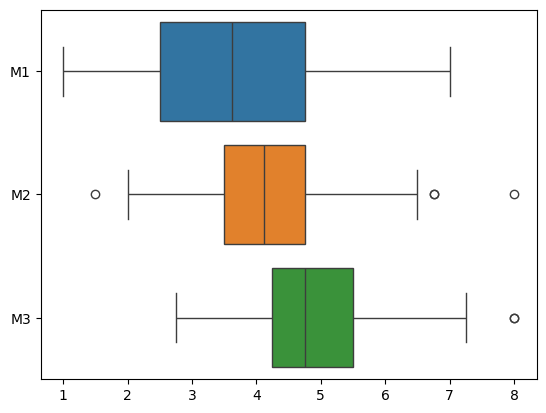

In [93]:
sns.boxplot(data=df[["M1", "M2", "M3"]], orient="h")
plt.show()

**Câu hỏi**: Hãy cho biết điểm số môn nào không xảy ra bất thường

**Trả lời**: Có 1 môn M1 là không xảy ra bất thường

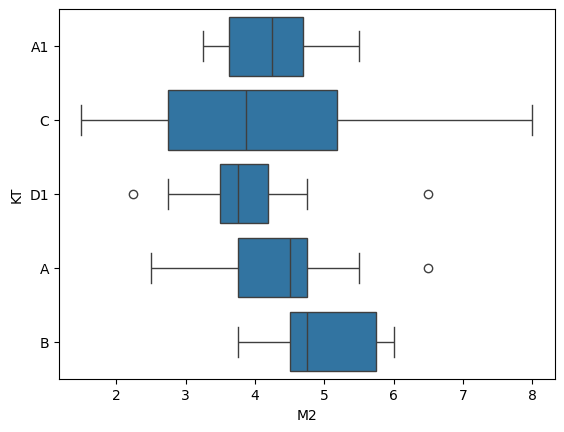

In [94]:
sns.boxplot(x="M2", y="KT", data=df, orient="h")
plt.show()

**Câu hỏi**: Khối thi nào có lower bound trùng với tứ phân vị thứ 1 (tức là Q1)

**Trả lời**: Lower bound khối D1 trùng với tứ phân vị 1 của Khối C 

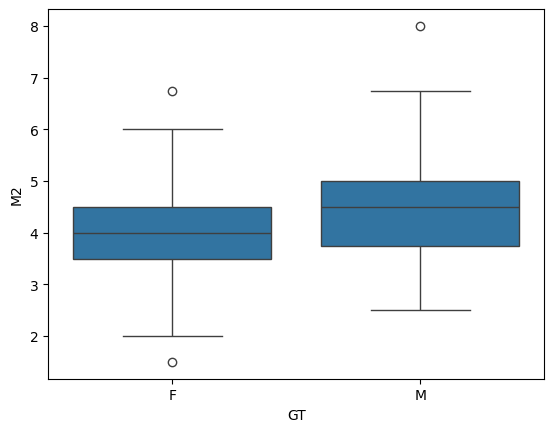

In [95]:
sns.boxplot(x="GT", y="M2", data=df)
plt.show()

- 1. M2 trên giới tính nào có bất thường

- **Trả lời**: Môn 2 trên cả hai giới tính đều có bất thường.

- 2. Có dễ dàng dự báo M2 theo yếu tố giới tính (GT) hay không?

- **Trả lời**: Không.

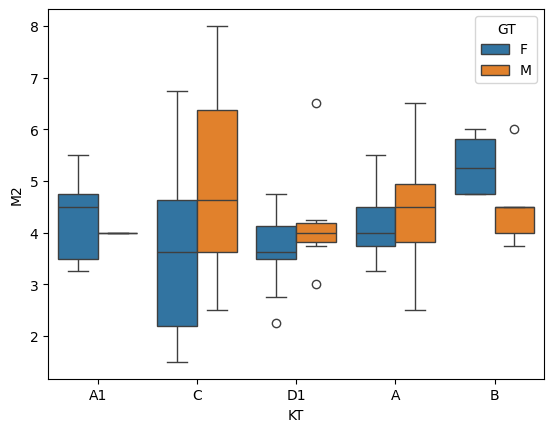

In [96]:
sns.boxplot(x="KT", y="M2", hue="GT", data=df)
plt.show()

**Câu hỏi**: Xác định các biểu đồ có dữ liệu bất thường

**Trả lời**: Biểu đồ giới tính nam và nữ của khối thi D1, và giới tính nam của khối B

# Phân tích đa biến định lượng (multivariate analysis)

In [97]:
df[["M1", "M2"]].cov() # co-variance

,M1,M2
M1,2.028939,0.053081
M2,0.053081,1.123712


- **Bài tập**: Xây dựng ma trận phương sai M1, M2, M3.
- So sánh sự tương quan (ảnh hưởng, tác động, liên hệ) giữa 
- M1 so với M3 
- M2 so với M3

In [98]:
df[['M1', 'M2', 'M3']].cov()

,M1,M2,M3
M1,2.028939,0.053081,0.027778
M2,0.053081,1.123712,-0.101010
M3,0.027778,-0.101010,1.083965


**M1 với M3**: cả 2 đều có xu hướng tăng

**M2 với M3**: cả 2 đều có xu hướng giảm

In [99]:
df[["M1", "M2"]].corr() # correlation

,M1,M2
M1,1.000000,0.035154
M2,0.035154,1.000000


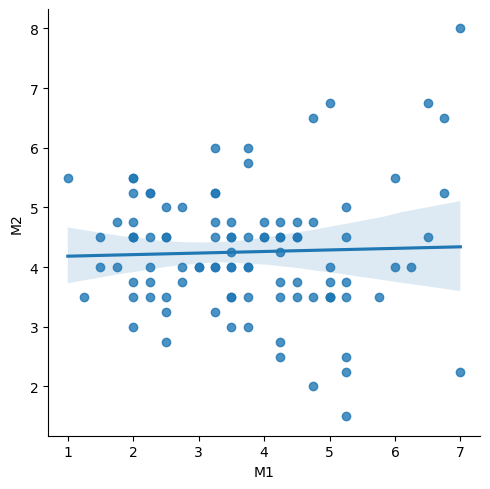

In [100]:
# Biểu đồ linear model plot biểu diễn mỗi quan hệ tuyến tính giữa 2 biến số
sns.lmplot(data=df, x="M1", y="M2", fit_reg=True)
plt.show()

**Câu hỏi**: Vẽ biểu đồ khám phá tương quan tuyến tính giữa M2 và M3

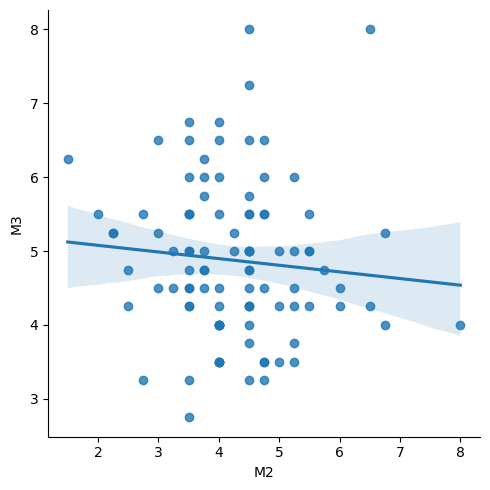

In [102]:
sns.lmplot(data=df, x='M2', y='M3', fit_reg=True)
plt.show()

In [103]:
df[["M1", "M2", "M3"]].corr()

,M1,M2,M3
M1,1.000000,0.035154,0.018731
M2,0.035154,1.000000,-0.091523
M3,0.018731,-0.091523,1.000000


**Câu hỏi**: Hãy viết code sắp xếp tăng dần mức độ tác động (tương quan tuyến tính) của M2, M3 đến M1

**Câu hỏi**: Hãy viết code tìm cặp tương quan tuyến tính cao nhất

In [117]:
corr = df[["M1", "M2", "M3"]].corr()

corr_dict = {
    'M1 -> M2': corr['M1']['M2'],
    'M1 -> M3': corr['M1']['M3'],
    'M2 -> M3': corr['M2']['M3'],
}

print(corr_dict)

print(sorted(corr_dict.items(), key=lambda x: 1 - abs(x[1])))

{'M1 -> M2': np.float64(0.03515405725785028), 'M1 -> M3': np.float64(0.018730760164382937), 'M2 -> M3': np.float64(-0.09152288755408222)}
[('M2 -> M3', np.float64(-0.09152288755408222)), ('M1 -> M2', np.float64(0.03515405725785028)), ('M1 -> M3', np.float64(0.018730760164382937))]


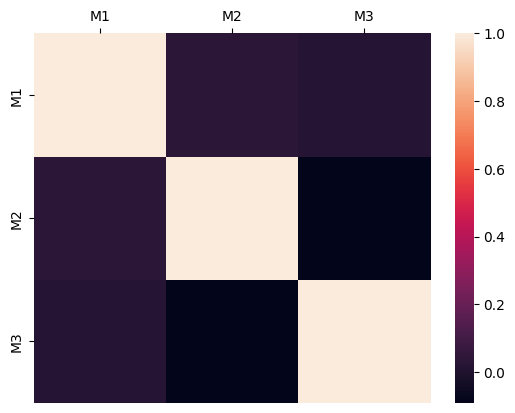

In [ ]:
# biểu đồ biểu diễn mức độ tương quan giữa các biến
sns.heatmap(df[["M1", "M2", "M3"]].corr(), vmax=1.0, square=False).xaxis.tick_top()

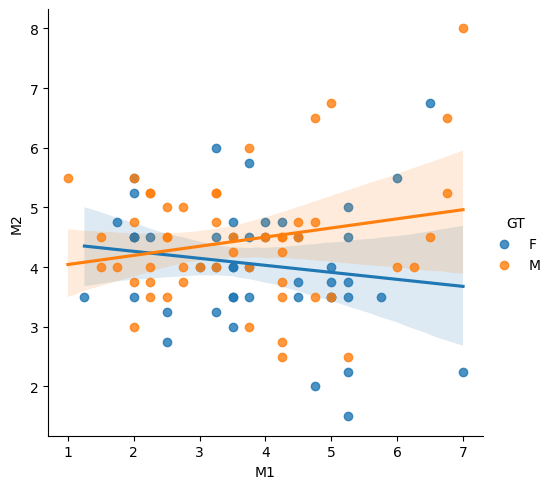

In [120]:
sns.lmplot(data=df, x="M1", y="M2", hue="GT", fit_reg=True)
plt.show()

In [121]:
df.groupby("GT")[["M1", "M2"]].corr()

M1        M2
GT                       
F  M1  1.000000 -0.155110
   M2 -0.155110  1.000000
M  M1  1.000000  0.214674
   M2  0.214674  1.000000

**Câu hỏi**: Tương quan tuyến tính (M1, M2) của nhóm giới tính nào cao hơn

**Trả lời**: Tương quan tuyến tính (M1, M2) của nhóm giới tính Male cao hơn

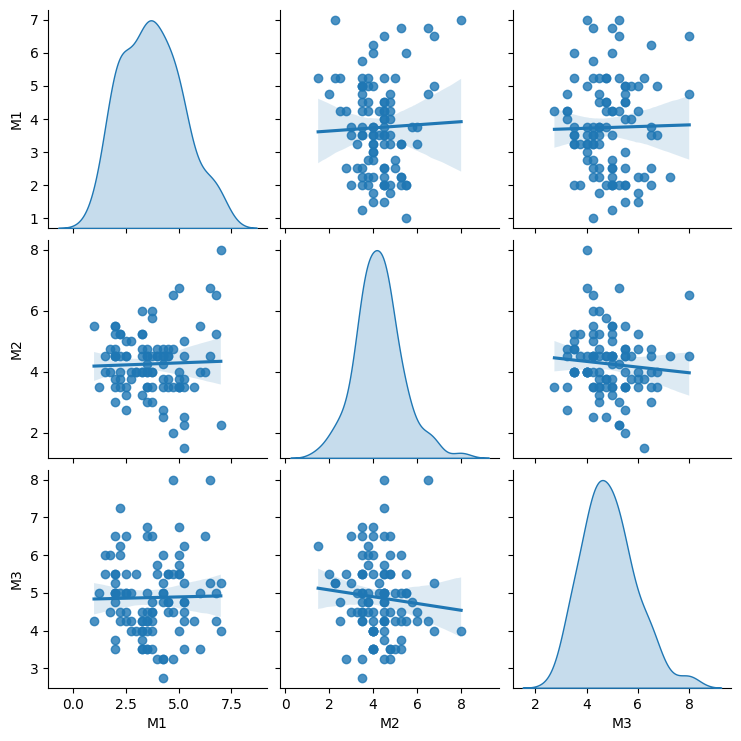

In [122]:
# Biểu đồ pairplot biểu diễn mỗi quan hệ tuyến tính giữa 2 biến số (đường chéo: phân phối xác xuất, Còn lại: biểu đồ phân tán giữa 2 biến)
sns.pairplot(df[["M1", "M2", "M3"]], diag_kind="kde", kind="reg")
plt.show()